In [69]:
pip install imbalanced-learn

     |████████████████████████████████| 167 kB 2.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd

In [2]:
url="https://bd29ee0e-54ab-4daa-9671-d153865d1620.usrfiles.com/ugd/bd29ee_472fad235246430d9360348eb5c6962c.csv"
df=pd.read_csv(url)
df.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0


In [3]:
df.shape

(776, 27)

In [7]:
loharu=df[df["LOCATION_ID"]=="LOHARU"]
loharu

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
351,1.99,LOHARU,0.3,0.2,0.06,0.0,0.2,0.0,0.3,5.0,...,0.4,0,0.2,0.0,2.0,1.46,0.4,0.5,0.292,0


In [8]:
nuh=df[df["LOCATION_ID"]=="NUH"]
nuh

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
355,1.99,NUH,0.55,0.2,0.11,0.0,0.2,0.0,0.55,5.0,...,0.4,0,0.2,0.0,2.0,1.644,0.4,0.5,0.3288,0


In [9]:
safidon=df[df["LOCATION_ID"]=="SAFIDON"]
safidon

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
367,1.99,SAFIDON,0.48,0.2,0.096,0.0,0.2,0.0,0.48,5.0,...,0.4,0,0.2,0.0,2.0,1.59,0.4,0.5,0.318,0


In [10]:
df=df.drop(index=[351,355,367])
df.shape

(773, 27)

In [16]:
df.isna().any()

Sector_score      False
LOCATION_ID       False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value        True
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
dtype: bool

In [17]:
df=df.fillna(df.median())
df.isna().any()

Sector_score      False
LOCATION_ID       False
PARA_A            False
Score_A           False
Risk_A            False
PARA_B            False
Score_B           False
Risk_B            False
TOTAL             False
numbers           False
Score_B.1         False
Risk_C            False
Money_Value       False
Score_MV          False
Risk_D            False
District_Loss     False
PROB              False
RiSk_E            False
History           False
Prob              False
Risk_F            False
Score             False
Inherent_Risk     False
CONTROL_RISK      False
Detection_Risk    False
Audit_Risk        False
Risk              False
dtype: bool

In [18]:
y=df[["Risk"]]
y.groupby("Risk")["Risk"].count()

Risk
0    468
1    305
Name: Risk, dtype: int64

In [19]:
X=df.drop(["Risk"],axis=1)
X.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832


In [20]:
import numpy as np
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


test = SelectKBest(score_func=f_classif, k="all")
fit = test.fit(X, np.asarray(y).reshape(y.shape[0],))
features = fit.transform(X)
set_printoptions(precision=3)

scores=fit.scores_
scores=pd.DataFrame(scores)
scores=scores.rename(columns={0:"scores"})
scores=scores.sort_values(by=["scores"],ascending=False)
scores

/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:115: UserWarning: Features [24] are constant.
  UserWarning)
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/feature_selection/_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,scores
21,1241.671993
13,692.516486
6,521.031442
3,478.156221
23,161.258917
17,156.868427
15,149.638858
0,144.597779
4,133.763122
2,128.703470


In [21]:
scores=scores.fillna(0)

In [48]:
X_scores=scores[scores["scores"]>70]
len(X_scores)

16

In [57]:
Xp=X.iloc[:,X_scores.index]
Xp.head()

,Score,Score_MV,Score_B,Score_A,CONTROL_RISK,RiSk_E,District_Loss,Sector_score,Risk_A,PARA_A,Inherent_Risk,Score_B.1,Risk_C,numbers,Prob,TOTAL
0,2.4,0.2,0.2,0.6,0.4,0.4,2,3.89,2.508,4.18,8.574,0.2,1.0,5.0,0.2,6.68
1,2.0,0.2,0.2,0.2,0.4,0.4,2,3.89,0.000,0.00,2.554,0.2,1.0,5.0,0.2,4.83
2,2.0,0.2,0.2,0.2,0.4,0.4,2,3.89,0.102,0.51,1.548,0.2,1.0,5.0,0.2,0.74
3,4.4,0.6,0.6,0.2,0.4,0.4,2,3.89,0.000,0.00,17.530,0.6,3.6,6.0,0.2,10.80
4,2.0,0.2,0.2,0.2,0.4,0.4,2,3.89,0.000,0.00,1.416,0.2,1.0,5.0,0.2,0.08


I commented out the standardization because standardization did not improve accuracy on test data.

In [62]:
#from sklearn.preprocessing import StandardScaler
#scaler=StandardScaler()
#Xp=pd.DataFrame(scaler.fit_transform(Xp),columns=Xp.columns)
#Xp.head()

In [66]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Xp,y,test_size=0.3,random_state=42)
print(X_train.shape)
print(X_test.shape)

(541, 16)
(232, 16)


In [99]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(k_neighbors=6,random_state=42)
#X_res, y_res = sm.fit_resample(X_train, y_train)

In [100]:
#print(X_res.shape)

In [101]:
from sklearn.naive_bayes import GaussianNB
model1=GaussianNB().fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
model1

GaussianNB()

In [103]:
from sklearn.metrics import accuracy_score
train_pred=model1.predict(X_train)
test_pred=model1.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  0.9759704251386322
Accuracy on test data:  0.978448275862069


In [104]:
from sklearn.metrics import roc_auc_score 
print("ROC_AUC on train data: ",roc_auc_score(y_train,train_pred))
print("ROC_AUC on test data: ",roc_auc_score(y_test,test_pred))

ROC_AUC on train data:  0.977751402675874
ROC_AUC on test data:  0.9817518248175183


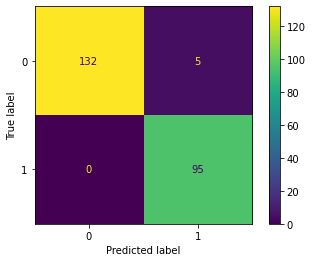

In [149]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(model1,X_test,y_test)
plt.show()

In [145]:
from sklearn.ensemble import RandomForestClassifier
model3=RandomForestClassifier(random_state=0).fit(X_train,np.asarray(y_train).reshape(y_train.shape[0],))
model3

RandomForestClassifier(random_state=0)

In [146]:
train_pred=model3.predict(X_train)
test_pred=model3.predict(X_test)
print("Accuracy on train data: ",accuracy_score(y_train,train_pred))
print("Accuracy on test data: ",accuracy_score(y_test,test_pred))

Accuracy on train data:  1.0
Accuracy on test data:  0.9956896551724138


In [147]:
print("ROC_AUC on train data: ",roc_auc_score(y_train,train_pred))
print("ROC_AUC on test data: ",roc_auc_score(y_test,test_pred))

ROC_AUC on train data:  1.0
ROC_AUC on test data:  0.9947368421052631


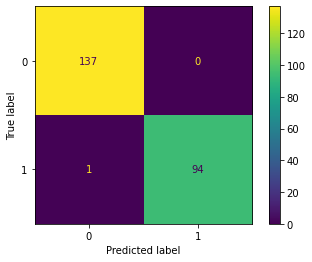

In [150]:
plot_confusion_matrix(model3,X_test,y_test)
plt.show()